# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
from datetime import date

## Generate Cities List

In [4]:
# creating cities list
cities = []

#Generating random latitudes and longitudes
latitude = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitude = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Creating for loop to find cities from citipy using the randomly generated lat-long
for x in range(len(latitude)):
    city = citipy.nearest_city(latitude[x], longitude[x])
       
   #getting city names and country from citipy
    city_name = city.city_name + "," + city.country_code
    
    #Adding city names to the empty list
    cities.append(city_name)
    
#filtering out only the unique cities name from the list
unique_cities = set(cities)
len(unique_cities)
cities

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

#Creating an empty list for each of the parameters
city_temperature = []
city_cloudiness = []
city_humidity = []
city_windspeed = []
city_latitudes = []
city_longitudes=[]
city_name_list = []
city_two=[]

# set initial count quantities for organization
count_one = 0
set_one = 1

#converting Temperature from Kelvin to Farenheit
units = "imperial"

#Creating a for loop to get data from openweathermap for each city in the city list
for city in unique_cities:
    
    #Creating specific url for each city using the api_key
    target_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    try:
        #Converting the weather data to a json file
        city_data = requests.get(target_url).json()
        
        if ( city_data["main"] and  city_data["clouds"] and city_data["wind"] and city_data["coord"]):
            
            #Retrieve name of each city
            city_name = city_data["name"]
            city_name_list.append(city_name)
        
            #retriving temperature for each city from the weather data and adding it to the empty list    
            city_temp = city_data["main"]["temp"]
            city_temperature.append(city_temp)

            #retriving cloudiness for each city from the weather data and adding it to the empty list  
            city_cloud = city_data["clouds"]["all"]
            city_cloudiness.append(city_cloud)

            #retriving humidity for each city from the weather data and adding it to the empty list  
            city_humi = city_data["main"]["humidity"]
            city_humidity.append(city_humi)

            #retriving wind speed for each city from the weather data and adding it to the empty list 
            #Converting wind speed to mph
            city_sp = round((city_data["wind"]["speed"])/ 0.44704,2)
            city_windspeed.append(city_sp)

            #retriving latitudes for each city from the weather data
            city_lat = city_data["coord"]["lat"]
            city_latitudes.append(city_lat)
            
            #retriving longitudes for each city from the weather data
            city_lng = city_data["coord"]["lon"]
            city_longitudes.append(city_lng)
            
            if count_one >= 50:
                count_one = 1
                set_one += 1
                city_two.append(city)
            else:
                count_one = count_one + 1
                city_two.append(city)
            print(f"Processing Record {count_one} of Set {set_one} | {city}")
            
            
    except Exception:
        print("City not found. Skipping...")
print("\nData Retrieval Complete\n")

    

Processing Record 1 of Set 1 | meulaboh,id
Processing Record 2 of Set 1 | vostochnyy,ru
Processing Record 3 of Set 1 | bambous virieux,mu
Processing Record 4 of Set 1 | olenegorsk,ru
Processing Record 5 of Set 1 | port hedland,au
Processing Record 6 of Set 1 | sumbe,ao
Processing Record 7 of Set 1 | muroto,jp
Processing Record 8 of Set 1 | ponta do sol,cv
Processing Record 9 of Set 1 | mana,gf
Processing Record 10 of Set 1 | kailua,us
Processing Record 11 of Set 1 | avarua,ck
Processing Record 12 of Set 1 | clyde river,ca
Processing Record 13 of Set 1 | kruisfontein,za
Processing Record 14 of Set 1 | ushuaia,ar
Processing Record 15 of Set 1 | tabou,ci
Processing Record 16 of Set 1 | boden,se
Processing Record 17 of Set 1 | ponta do sol,pt
Processing Record 18 of Set 1 | arraial do cabo,br
Processing Record 19 of Set 1 | nanortalik,gl
Processing Record 20 of Set 1 | rosarito,mx
Processing Record 21 of Set 1 | port hardy,ca
Processing Record 22 of Set 1 | pulandian,cn
Processing Record 2

Processing Record 25 of Set 4 | ulaanbaatar,mn
Processing Record 26 of Set 4 | smithers,ca
Processing Record 27 of Set 4 | palmer,us
Processing Record 28 of Set 4 | huarmey,pe
Processing Record 29 of Set 4 | bandar-e lengeh,ir
Processing Record 30 of Set 4 | komsomolskiy,ru
Processing Record 31 of Set 4 | pouembout,nc
Processing Record 32 of Set 4 | isangel,vu
Processing Record 33 of Set 4 | dunedin,nz
Processing Record 34 of Set 4 | porto,br
Processing Record 35 of Set 4 | yar-sale,ru
Processing Record 36 of Set 4 | matara,lk
Processing Record 37 of Set 4 | evensk,ru
Processing Record 38 of Set 4 | tres lagoas,br
Processing Record 39 of Set 4 | nyaunglebin,mm
Processing Record 40 of Set 4 | kutum,sd
Processing Record 41 of Set 4 | huilong,cn
City not found. Skipping...
Processing Record 42 of Set 4 | mehamn,no
Processing Record 43 of Set 4 | vallenar,cl
Processing Record 44 of Set 4 | kampot,kh
Processing Record 45 of Set 4 | turukhansk,ru
Processing Record 46 of Set 4 | nurota,uz
Pro

Processing Record 46 of Set 7 | berlevag,no
Processing Record 47 of Set 7 | college,us
Processing Record 48 of Set 7 | port lincoln,au
Processing Record 49 of Set 7 | dalbeattie,gb
Processing Record 50 of Set 7 | stendal,de
Processing Record 1 of Set 8 | nadaun,in
Processing Record 2 of Set 8 | magadan,ru
Processing Record 3 of Set 8 | tautira,pf
Processing Record 4 of Set 8 | iquitos,pe
Processing Record 5 of Set 8 | harper,lr
Processing Record 6 of Set 8 | marovoay,mg
Processing Record 7 of Set 8 | puerto escondido,mx
Processing Record 8 of Set 8 | hofn,is
Processing Record 9 of Set 8 | osa,ru
Processing Record 10 of Set 8 | coihaique,cl
Processing Record 11 of Set 8 | ust-kan,ru
Processing Record 12 of Set 8 | roma,au
City not found. Skipping...
Processing Record 13 of Set 8 | mangrol,in
Processing Record 14 of Set 8 | mosquera,co
Processing Record 15 of Set 8 | kattivakkam,in
Processing Record 16 of Set 8 | springfield,us
Processing Record 17 of Set 8 | moscow,us
Processing Record 

Processing Record 21 of Set 11 | san patricio,mx
Processing Record 22 of Set 11 | severo-kurilsk,ru
City not found. Skipping...
Processing Record 23 of Set 11 | hithadhoo,mv
Processing Record 24 of Set 11 | haines junction,ca
Processing Record 25 of Set 11 | ormara,pk
Processing Record 26 of Set 11 | stephenville,ca
Processing Record 27 of Set 11 | weiser,us
Processing Record 28 of Set 11 | iranshahr,ir
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 11 | krasnoselkup,ru
City not found. Skipping...
Processing Record 30 of Set 11 | vestmannaeyjar,is
Processing Record 31 of Set 11 | qasigiannguit,gl
Processing Record 32 of Set 11 | kupang,id
Processing Record 33 of Set 11 | yellowknife,ca
Processing Record 34 of Set 11 | ambon,id
Processing Record 35 of Set 11 | leeton,au
Processing Record 36 of Set 11 | ippy,cf
Processing Record 37 of Set 11 | la palma,pa
Processing Record 38 of Set 11 | kamenka,ru
Processing Record 39 of Set 11 | geraldton,au
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
summary_data = pd.DataFrame({"City": city_name_list,
                             "Latitude": city_latitudes,
                             "Longitudes":city_longitudes,
                             "Temperature (F)": city_temperature, 
                             "Cloudiness (%)": city_cloudiness,
                             "Humidity (%)": city_humidity,
                             "Wind Speed (mph)": city_windspeed,                       
                             "City": city_name_list                
                             })
summary_data.head()

# Save Data to csv
summary_data.to_csv("Cities_weather_data.csv", encoding="utf-8", index=False)

len(summary_data)
summary_data.head()

,City,Latitude,Longitudes,Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,Meulaboh,4.14,96.13,76.73,99,84,11.97
1,Vostochnyy,55.82,37.87,48.22,7,75,25.01
2,Bambous Virieux,-20.34,57.76,70.38,75,73,28.52
3,Olenegorsk,68.15,33.30,40.86,100,89,27.83
4,Port Hedland,-20.32,118.57,68.00,1,94,13.02


In [14]:
summary_data.columns

Index(['City', 'Latitude', 'Longitudes', 'Temperature (F)', 'Cloudiness (%)',
       'Humidity (%)', 'Wind Speed (mph)'],
      dtype='object')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
summary_data[summary_data["Humidity (%)"]>100]

,City,Latitude,Longitudes,Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with humidity >100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

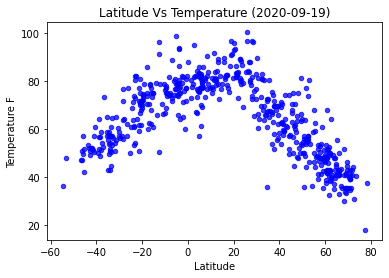

In [26]:
plt.scatter(summary_data["Latitude"],summary_data["Temperature (F)"], marker="o", facecolors="blue",
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.title(f"Latitude Vs Temperature ({date.today()})")
plt.savefig('Lat Vs Temp.png')
plt.show()

## Latitude vs. Humidity Plot

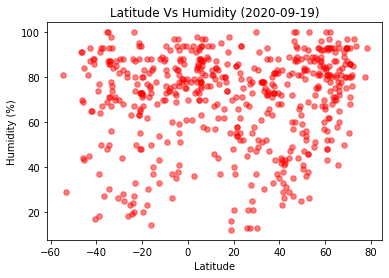

In [27]:

plt.scatter(summary_data["Latitude"],summary_data["Humidity (%)"], marker="o", facecolors="red",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude Vs Humidity ({date.today()})")
plt.savefig('Lat Vs Humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

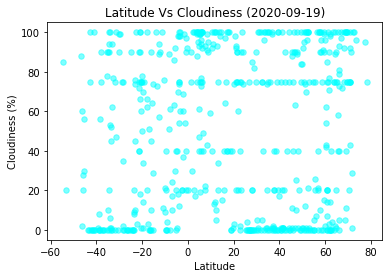

In [28]:
plt.scatter(summary_data["Latitude"],summary_data["Cloudiness (%)"], marker="o", facecolors="aqua",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude Vs Cloudiness ({date.today()})")
plt.savefig('Lat Vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

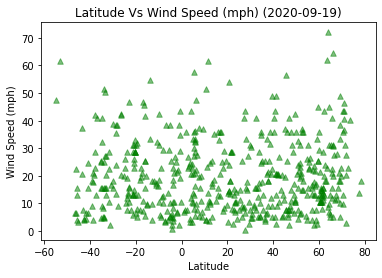

In [31]:
plt.scatter(summary_data["Latitude"],summary_data["Wind Speed (mph)"], marker="^", facecolors="green",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude Vs Wind Speed (mph) ({date.today()})")
plt.savefig('Lat Vs WindSpeed(mph).png')
plt.show()

## Linear Regression

In [34]:
nothern = summary_data.loc[summary_data["Latitude"] >= 0.0]
nothern.reset_index(inplace=True)
nothern

,index,City,Latitude,Longitudes,Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,0,Meulaboh,4.14,96.13,76.73,99,84,11.97
1,1,Vostochnyy,55.82,37.87,48.22,7,75,25.01
2,3,Olenegorsk,68.15,33.30,40.86,100,89,27.83
3,6,Muroto-misakicho,33.28,134.15,69.76,100,78,15.50
4,7,Ponta do Sol,17.20,-25.09,82.40,40,74,36.04
...,...,...,...,...,...,...,...,...
352,532,Yellowknife,62.46,-114.35,64.40,40,52,13.02
353,535,Ippy,6.27,21.22,69.39,100,97,9.71
354,536,La Palma,8.40,-78.15,82.18,91,76,19.91
355,537,Kamenka,51.32,42.77,48.99,12,83,21.68


In [35]:
southern = summary_data.loc[summary_data["Latitude"] < 0.0]
southern.reset_index(inplace=True)
southern

,index,City,Latitude,Longitudes,Temperature (F),Cloudiness (%),Humidity (%),Wind Speed (mph)
0,2,Bambous Virieux,-20.34,57.76,70.38,75,73,28.52
1,4,Port Hedland,-20.32,118.57,68.00,1,94,13.02
2,5,Sumbe,-11.21,13.84,70.39,100,89,16.71
3,10,Avarua,-21.21,-159.78,77.00,90,88,31.03
4,12,Kruisfontein,-34.00,24.73,51.01,53,86,4.76
...,...,...,...,...,...,...,...,...
178,522,Hithadhoo,-0.60,73.08,82.18,92,79,29.01
179,531,Kupang,-10.17,123.58,76.48,21,88,16.22
180,533,Ambon City,-3.70,128.18,79.29,12,81,3.56
181,534,Leeton,-34.57,146.40,59.00,90,93,15.50


In [ ]:
# Define plotting function
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/f{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression